In [126]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [127]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit_card_default.csv')

In [128]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [129]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [130]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [131]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- As per data dictionary there are 5 categories 1 to 5 for Education column and 5 and 6 are both showing as 'UNKNOWN'. There is no **0** category in the dictionary but present in dataset.

- Hence Combining `0, 5, and 6` together as **'UNKNOWN'** category. Changing all `6 and 0` to `5`.

In [132]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)

In [133]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [134]:
df.MARRIAGE.value_counts() 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


- As per data dictionary there are 3 categories 1 to 3 for Marriage column but **0** category present in dataset.
- Hence Combining `0` as **'Others'** category. Changing all `0` to `3`.

In [135]:
df['MARRIAGE'].replace(0, 3, inplace=True)

In [136]:
df.MARRIAGE.value_counts() 

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [137]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [138]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [139]:
# Check missing value
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

- In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

#  Data Preparation and Model Building

In [140]:
# Dropping id column as it's no use
df.drop('ID',axis=1, inplace=True)

In [141]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [142]:
# Putting feature variable to X
X = df.drop('default.payment.next.month',axis=1)

In [143]:
# Putting response variable to y
y = df['default.payment.next.month']

In [144]:
# Splitting the data into train and test
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

# Running the random forest with default parameters.

In [145]:
rfc = RandomForestClassifier()

In [146]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [147]:
# Making predictions
predictions = rfc.predict(X_test)

In [148]:
# Let's check report of our default model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [149]:
# Print confusion matrix
print(confusion_matrix(y_test,predictions))

[[6663  395]
 [1242  700]]


In [150]:
# Print accuracy score
print(accuracy_score(y_test, predictions))

0.8181111111111111


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

# Hyperparameter Tuning

-The following hyperparameters are present in a random forest classifier. We will tune each parameters
 
 
- **n_estimators** 
- **criterion**
- **max_features** 
- **max_depth**
- **min_samples_split**
- **min_samples_leaf**
- **min_weight_fraction_leaf**
- **max_leaf_nodes**
- **min_impurity_split**

# Tuning max_depth

- Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble

In [152]:
# specify number of folds for k-fold CV
n_folds = 5

In [153]:
# Parameter to build the model
parameters = {'max_depth': range(2, 20, 5)}

In [154]:
# instantiate the model
rf = RandomForestClassifier()

In [155]:
# fit tree on training data
rf = GridSearchCV(rf, parameters,
                 cv= n_folds,
                 scoring="accuracy",
                 return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [156]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.706691,0.008793,0.028870,0.000499,2,{'max_depth': 2},0.800238,0.803333,0.800238,0.793571,...,0.799667,0.003253,4,0.796964,0.800238,0.800476,0.799643,0.802024,0.799869,0.001651
1,1.781869,0.037138,0.044273,0.001430,7,{'max_depth': 7},0.814286,0.820952,0.819048,0.815238,...,0.817286,0.002445,1,0.832202,0.831190,0.830952,0.833155,0.830417,0.831583,0.000976
2,2.714662,0.037012,0.063810,0.000456,12,{'max_depth': 12},0.812619,0.815238,0.819762,0.813333,...,0.815905,0.002823,2,0.882619,0.881667,0.881905,0.885655,0.886310,0.883631,0.001956
3,3.470442,0.115717,0.079512,0.001988,17,{'max_depth': 17},0.815714,0.816429,0.818333,0.810000,...,0.814905,0.002812,3,0.925595,0.929643,0.931905,0.932500,0.930119,0.929952,0.002425


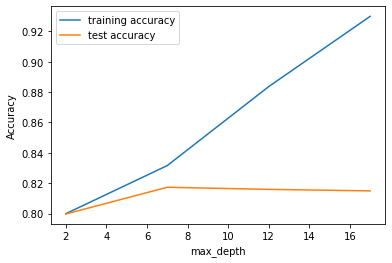

In [157]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [158]:
rf.score(X_test,y_test)

0.8255555555555556

- You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. 
- The ensemble tries to overfit as we increase the max_depth.
 
- Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

# Tuning n_estimators

- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.


In [159]:
# specify number of folds for k-fold CV
n_folds = 5

In [160]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

In [161]:
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)

In [162]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [163]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.189681,0.031416,0.036896,0.004495,100,{'n_estimators': 100},0.812143,0.812143,0.811667,0.806190,...,0.810190,0.002354,1,0.810952,0.810119,0.812798,0.812440,0.813155,0.811893,0.001161
1,6.159028,0.384315,0.165430,0.006070,500,{'n_estimators': 500},0.812143,0.814048,0.811429,0.805714,...,0.810190,0.003062,2,0.811429,0.810298,0.811905,0.813452,0.812798,0.811976,0.001093
2,11.157934,0.552513,0.329855,0.032179,900,{'n_estimators': 900},0.810714,0.814286,0.811190,0.805238,...,0.809667,0.003225,4,0.811012,0.809881,0.812024,0.812321,0.811607,0.811369,0.000864
3,16.153948,0.187111,0.438953,0.008285,1300,{'n_estimators': 1300},0.811429,0.813571,0.811190,0.805476,...,0.810000,0.002809,3,0.811250,0.809940,0.812321,0.812321,0.812560,0.811679,0.000981


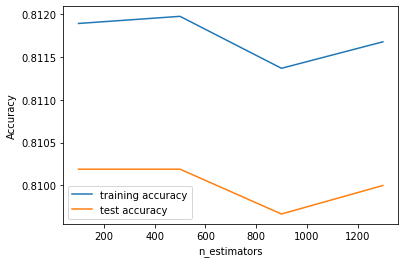

In [164]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [165]:
rf.score(X_test, y_test)

0.8178888888888889

# Tuning max_features

- Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.


In [166]:
# specify number of folds for k-fold CV
n_folds = 5

In [167]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

In [168]:
# instantiate the model
rf = RandomForestClassifier(max_depth=4)

In [169]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [170]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.013209,0.203566,0.131895,0.024105,4,{'max_features': 4},0.810476,0.814524,0.810238,0.805238,...,0.810429,0.003009,4,0.811131,0.811726,0.812262,0.812560,0.814048,0.812345,0.000981
1,4.732826,0.368358,0.112249,0.080113,8,{'max_features': 8},0.817619,0.821190,0.820000,0.816905,...,0.818762,0.001589,1,0.821190,0.820476,0.821548,0.822143,0.822202,0.821512,0.000641
2,8.365014,0.299572,0.069182,0.018216,14,{'max_features': 14},0.817381,0.821429,0.818810,0.817143,...,0.818524,0.001561,3,0.821667,0.820893,0.821786,0.822143,0.821845,0.821667,0.000418
3,10.476959,0.463810,0.110557,0.068869,20,{'max_features': 20},0.817619,0.821429,0.818095,0.818810,...,0.818762,0.001392,1,0.822619,0.821190,0.821607,0.823393,0.823214,0.822405,0.000870
4,0.201799,0.090052,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


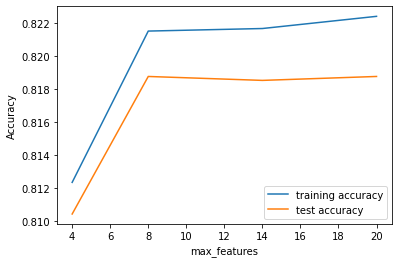

In [171]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [172]:
rf.score(X_test,y_test)

0.8266666666666667

- Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

# Tuning min_samples_leaf

- The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

- Let's now check the optimum value for min samples leaf in our case.

In [173]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


In [174]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [175]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.259151,0.075354,0.054974,0.001076,100,{'min_samples_leaf': 100},0.814762,0.818095,0.817143,0.810714,...,0.814238,0.003167,1,0.818393,0.816310,0.818393,0.818036,0.815714,0.817369,0.001132
1,1.975734,0.040556,0.050440,0.000356,150,{'min_samples_leaf': 150},0.814524,0.816190,0.814762,0.806905,...,0.812333,0.003587,2,0.814821,0.814226,0.814643,0.814405,0.812619,0.814143,0.000788
2,1.832070,0.038270,0.047347,0.000535,200,{'min_samples_leaf': 200},0.812381,0.813095,0.814048,0.805714,...,0.810524,0.003331,3,0.810238,0.809643,0.816786,0.812619,0.811369,0.812131,0.002540
3,1.734644,0.061586,0.049210,0.006813,250,{'min_samples_leaf': 250},0.811667,0.817857,0.810952,0.804286,...,0.810381,0.004594,4,0.811250,0.813274,0.809405,0.810595,0.809940,0.810893,0.001342
4,1.645713,0.022563,0.044204,0.000792,300,{'min_samples_leaf': 300},0.808333,0.811190,0.807619,0.806667,...,0.808048,0.001713,5,0.807798,0.807679,0.807440,0.812500,0.812024,0.809488,0.002273


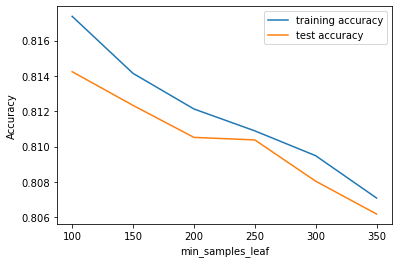

In [176]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [177]:
rf.score(X_test, y_test)

0.824

- You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

#  Tuning min_samples_split
 
- Let's now look at the performance of the ensemble as we vary min_samples_split.


In [178]:
# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()

In [179]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.156115,0.358282,0.065652,0.006830,200,{'min_samples_split': 200},0.819286,0.820476,0.821429,0.815000,...,0.818952,0.002206,2,0.823988,0.823988,0.824167,0.824345,0.823690,0.824036,0.000218
1,3.243860,0.048721,0.069549,0.004590,250,{'min_samples_split': 250},0.818333,0.820714,0.822381,0.816667,...,0.819286,0.002015,1,0.822738,0.822202,0.823214,0.822321,0.823393,0.822774,0.000471
2,3.375184,0.254059,0.065144,0.004459,300,{'min_samples_split': 300},0.818095,0.820238,0.820476,0.817143,...,0.818714,0.001377,3,0.821726,0.821310,0.820893,0.822143,0.822976,0.821810,0.000717
3,3.293601,0.185400,0.069933,0.007305,350,{'min_samples_split': 350},0.817857,0.819762,0.819524,0.815714,...,0.818143,0.001455,5,0.821310,0.820238,0.820119,0.821607,0.821071,0.820869,0.000590
4,3.351698,0.205656,0.070695,0.011712,400,{'min_samples_split': 400},0.817857,0.820238,0.820714,0.815714,...,0.818476,0.001817,4,0.820000,0.819345,0.819881,0.820536,0.821250,0.820202,0.000646


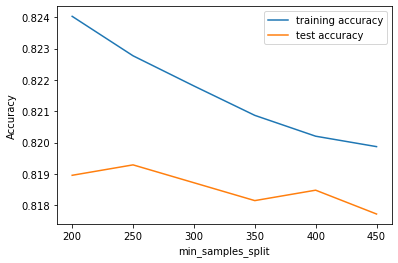

In [181]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

- We can now find the optimal hyperparameters using GridSearchCV.


In [182]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [183]:
# Create a based model
rf = RandomForestClassifier()

In [184]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [185]:
# fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [186]:
# Printing optimal accuracy score and hyperparameter
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184285714285714 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


In [187]:
type(grid_search.best_params_)

dict

- **Fitting the final model with the best parameters obtained from grid search.**

In [188]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)


In [189]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [190]:
# predict
predictions = rfc.predict(X_test)

In [191]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [192]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6754  304]
 [1255  687]]


In [193]:
print(accuracy_score(y_test,predictions))

0.8267777777777777


In [194]:
# Saving the model to disk
pickle.dump(rfc, open('artifacts/model.pkl', 'wb'))